<h1><center> Data Driven Decision Making for a Smarter City: A case study in Harlem Bins and Rats

>    The number of trash cans on Harlem streets is decreasing, leaving unsettling trash heaps in their wake. Though hungry racoons might be a first suspect of these disappearances, the New York City Sanitation Department (DSNY) is the culprit. Counterintuitive as it seems, the the city’s sanitation commissioner claims removing litter baskets can ensure cleaner streets, and curbs improper trash disposal.

>    Predictably, the actions of the city have perturbed the residents of Harlem into protest. These neighborhood locals insist that the removal of trash bins has left the sidewalks in disarray. Community members and elected officials worry that the decrease in bins and the upheaval of bagged trash on the sidewalks not only embarrass residents, but also bring roaches and rats to the streets. One member of the community states, “It’s not just an eyesore — it’s a health issue that negatively impacts the people who live and work in this community.”

>    While the city claims, according to its own inspection rating, cleaner streets, locals claim the opposite. So who do we listen to? As it stands, the claims of Harlem community members remain unsubstantiated aside from anecdotal testimony. Logically, these claims are believable, but with no evidence, the community board members and elected officials remain essentially voiceless.

NYC Open Data, an archive of public data generated by NYC agencies and other organizations can help us reach an answer. If it is proven that a lack of trash bins correlates to a rise in population of rats, removing trash cans from Harlem streets puts the health of  residents at risk. Using data available via the aforementioned archive on trash location and rat population, we can substantiate the local’s complaints  concretely and force the DSNY to replace the unfairly removed bins as a health safety measure. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import re
import seaborn as sns

To do so, we obtain two data files. ‘Rodent_inspection’ provided by the Department of Health and Mental Hygiene contains the location of all sites which failed rodent inspection criteria while ‘Public_Bins’ provided by the DSNY contains the locations of all public trash bins. 

We define some techniques to help us parse our data files for the information we would like.

In [2]:
#Read Data from 'Rodent_Inspection'
def read_rats(filename):
    a = pd.read_csv(filename)
    Lat = a['LATITUDE']
    Long = a['LONGITUDE']
    Result = a['RESULT']
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result}
    df = pd.DataFrame(data=d)
    return df 

#Assign each verbal result of inspection to a number 
def quantify_rats(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Result = df['Result']
    Q = np.zeros(len(Result))
    
    for i in range(0,len(Result)):
        if Result[i] == 'Bait applied':#=0
            Q[i]=0
        elif Result[i] =='Passed Inspection':#=1
            Q[i]=1
        elif Result[i] == 'Problem Conditions':#=2
            Q[i]=2
        elif Result[i] == 'Active Rat Signs':#=3
            Q[i]=3
            
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result, 'Quant' : Q}
    df = pd.DataFrame(data=d)
    return df 

#Sorts rat inspections based on severity of inspection result
def sort_rats(df,n):
    Lat = df['Latitude']
    Long = df['Longitude']
    Result = df['Result']
    Quant = df['Quant']
    ndx = (Quant == n)
    Lat = Lat[ndx]
    Long = Long[ndx]
    Result = Result[ndx]
    Quant = Quant[ndx]
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result, 'Quant' : Quant}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on rat inspections
def set_range_rats_Lat_min(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Result = df['Result']
    Quant = df['Quant']
    
    ndx = (Lat > 40.69)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Result = Result[ndx]
    Quant = Quant[ndx]
    
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result, 'Quant' : Quant}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on rat inspections
def set_range_rats_Lat_max(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Result = df['Result']
    Quant = df['Quant']
    
    ndx = (Lat < 40.9)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Result = Result[ndx]
    Quant = Quant[ndx]
    
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result, 'Quant' : Quant}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on rat inspections
def set_range_rats_Long_min(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Result = df['Result']
    Quant = df['Quant']
    
    ndx = (Long > -74.05)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Result = Result[ndx]
    Quant = Quant[ndx]
    
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result, 'Quant' : Quant}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on rat inspections
def set_range_rats_Long_max(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    Result = df['Result']
    Quant = df['Quant']
    
    ndx = (Long < -73.8)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    Result = Result[ndx]
    Quant = Quant[ndx]
    
    d = {'Latitude': Lat, 'Longitude': Long, 'Result': Result, 'Quant' : Quant}
    df = pd.DataFrame(data=d)
    return df 

In [3]:
#Read Data from 'Public_Bins'
def read_Bins(filename):
    a = pd.read_csv(filename)
    Location = a['the_geom']
    d = {'Location': Location}
    df = pd.DataFrame(data=d)
    return df 

#Parse Latitude and Longitude from unusually kept data file
def locate_trash(df):
    Location = df['Location']
    Q = len(Location)
    
    Lat = np.zeros(Q)
    Long = np.zeros(Q)
    
    for i in range(len(Location)):
        match=re.findall('\d+', str(df['Location'][i]))
        
        
        x=np.float64(match[0])
        y=np.float64(match[1])
        z=np.float64(y*10**(-14))
        Long[i]=-1*(x+z)
        
        x=np.float64(match[2])
        y=np.float64(match[3])
        z=np.float64(y*10**(-14))
        Lat[i]=(x+z)
            
    d = {'Latitude': Lat, 'Longitude': Long}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on public bins
def set_range_trash_Lat_min(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    
    ndx = (Lat > 40.69)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    d = {'Latitude': Lat, 'Longitude': Long}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on public bins
def set_range_trash_Lat_max(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    
    ndx = (Lat < 40.9)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    d = {'Latitude': Lat, 'Longitude': Long}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on public bins
def set_range_trash_Long_min(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    
    ndx = (Long > -74.05)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    d = {'Latitude': Lat, 'Longitude': Long}
    df = pd.DataFrame(data=d)
    return df 

#Sets location range on public bins
def set_range_trash_Long_max(df):
    Lat = df['Latitude']
    Long = df['Longitude']
    
    ndx = (Long < -73.8)
    
    Lat = Lat[ndx]
    Long = Long[ndx]
    d = {'Latitude': Lat, 'Longitude': Long}
    df = pd.DataFrame(data=d)
    return df 

We read the 'Rodent_inspection' data file, and from it obtain the latitude and longitude of every active rat sight. 

In [4]:
#Read the Rodent_Inspection data file
rats_read = read_rats("Rodent_Inspection.csv")
#Sort rats based on verbal inspection results
rats_quantified = quantify_rats(rats_read)
#Create a data frame containing only sights with active rat sights
rats_act =  sort_rats(rats_quantified,3)

We also make sure the rat inspection sites are all within the range of NYC

In [5]:
#Set boundaries to rat inspection information that match public bin data 
rats = set_range_rats_Lat_min(rats_act)
rats = set_range_rats_Lat_max(rats)
rats = set_range_rats_Long_min(rats)
rats = set_range_rats_Long_max(rats)

To visualize our data, we plot a 2 dimensional probability distribution of active rat sights in the city. This tells us the density of rats in each area in the city, or how likely it is that a rat will be in the location we pinpoint.

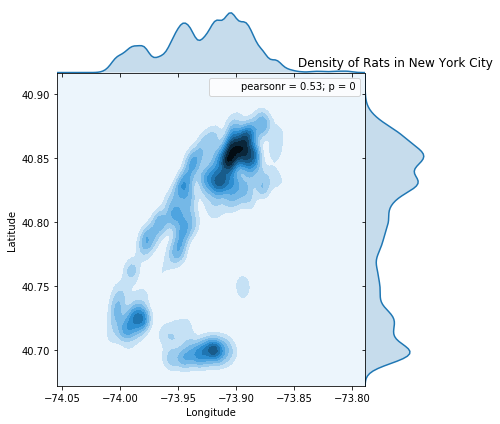

In [6]:
sns.jointplot(rats.Longitude, rats.Latitude, kind='kde',space=0)
plt.title('Density of Rats in New York City')
plt.show()

In [7]:
#Read the Public_Bins data file
trash = read_Bins('Public_Bins.csv')
trash = locate_trash(trash)

In [8]:
#Set boundaries to public bin information that match public rat inspection data
trash = set_range_trash_Lat_min(trash)
trash = set_range_trash_Lat_max(trash)
trash = set_range_trash_Long_min(trash)
trash = set_range_trash_Long_max(trash)

To visualize our data, we plot a 2 dimensional probability distribution of public bins in the city. This tells us the density of trash cans in each area in the city, or how likely it is that a trash can will be in the location we pinpoint.

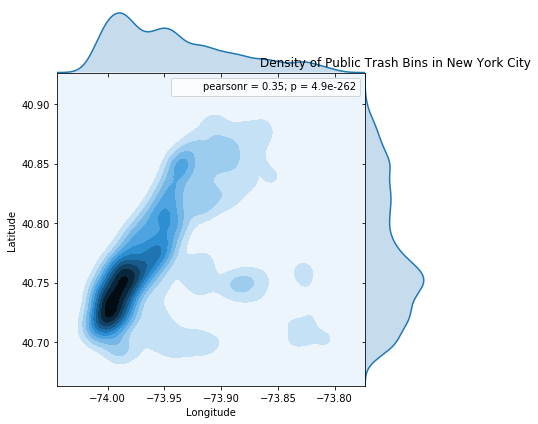

In [9]:
sns.jointplot(trash.Longitude, trash.Latitude, kind='kde',space=0)
plt.title('Density of Public Trash Bins in New York City')
plt.show()

We are also able to create a scatter plot of our data to visualize some of the overlap.

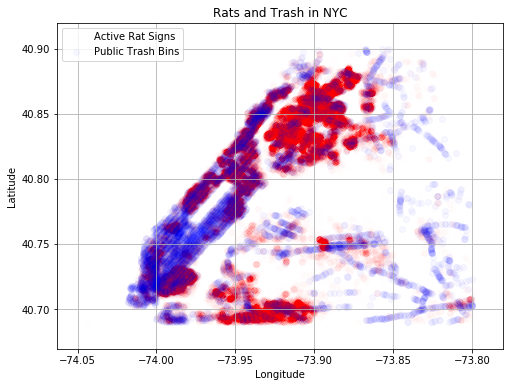

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(rats['Longitude'], rats['Latitude'], color='red',label='Active Rat Signs',alpha=0.002)
plt.scatter(trash['Longitude'], trash['Latitude'], color='blue', alpha=0.03,label='Public Trash Bins')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rats and Trash in NYC')
plt.grid()
plt.legend()
plt.show()

Finally, we calculate the covariance of the location of public trash bins and active rat sights to find the relationship between them. 

In [11]:
#Set Bounds for the area of interest
min_lat, max_lat = (40.69,40.9)
min_lon, max_lon = (-74.05,-73.8)

#Separate out the regions of interest
rats_bin = rats.query(str(min_lat)+'<=Latitude<='+str(max_lat))
rats_bin = rats.query(str(min_lon)+'<=Longitude<='+str(max_lon))

trash_bin = trash.query(str(min_lat)+'<=Latitude<='+str(max_lat))
trash_bin = trash.query(str(min_lon)+'<=Longitude<='+str(max_lon))

#Resolution of our grid (NxN)
N = 10000

#Create bins
lats = np.linspace(min_lat, max_lat, N)
lons = np.linspace(min_lon, max_lon, N)

#Define function for mapping our latitude/longitude into binned ranges
def lat_step(lat):
    idx = (np.abs(lats - lat)).argmin()
    return lats[idx]

def lon_step(lon):
    idx = (np.abs(lons - lon)).argmin()
    return lons[idx]


#Map latitude/longitude into our bins
rats_bin["latbin"] = rats_bin['Latitude'].map(lat_step)
rats_bin["lonbin"] = rats_bin['Longitude'].map(lon_step)

trash_bin["latbin"] = trash_bin['Latitude'].map(lat_step)
trash_bin["lonbin"] = trash_bin['Longitude'].map(lon_step)

#Group our data by our bins
rat_groups = rats_bin.groupby(("latbin", "lonbin"))
trash_groups = trash_bin.groupby(("latbin", "lonbin"))

#Count all of our results into bins
rats_count = rat_groups.count()['Quant']
trash_count = trash_groups.count()['Longitude']

#Put all results into a dataframe and fill results where there's only trash or only rats with 0
rats_trash = pd.DataFrame({'rats':rats_count,'trash':trash_count}).fillna(0)

In [12]:
rats_trash.cov()

,rats,trash
rats,6.015978,-0.280556
trash,-0.280556,0.110179


In [14]:
Covariance = -.028055
rats_std = np.std(rats_trash['rats'])
trash_std = np.std(rats_trash['trash'])
Correlation = Covariance/(rats_std*trash_std)

In [15]:
print Correlation

-0.0344598110073


This suggest a slight anti correlation between active rats sights and the presence of trash cans. This means that if trash cans are removed from the streets, we can expect an increase in the number of rats present.

Using this information, Harlem community members may be able to make a compelling case for the need of public trash cans to remain on streets. While my analysis is naive, and only relies on two small sets of data, it open gateways for inquiry that the DSNY claims to have shut. 
